In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud


In [2]:
plt.style.use('dark_background')

In [7]:
df = pd.read_csv('/kaggle/input/resume-screening/UpdatedResumeDataSet.csv' ,encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
data = pd.read_csv('/kaggle/input/resume-screening/UpdatedResumeDataSet.csv' ,encoding='utf-8')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
data.shape

(962, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


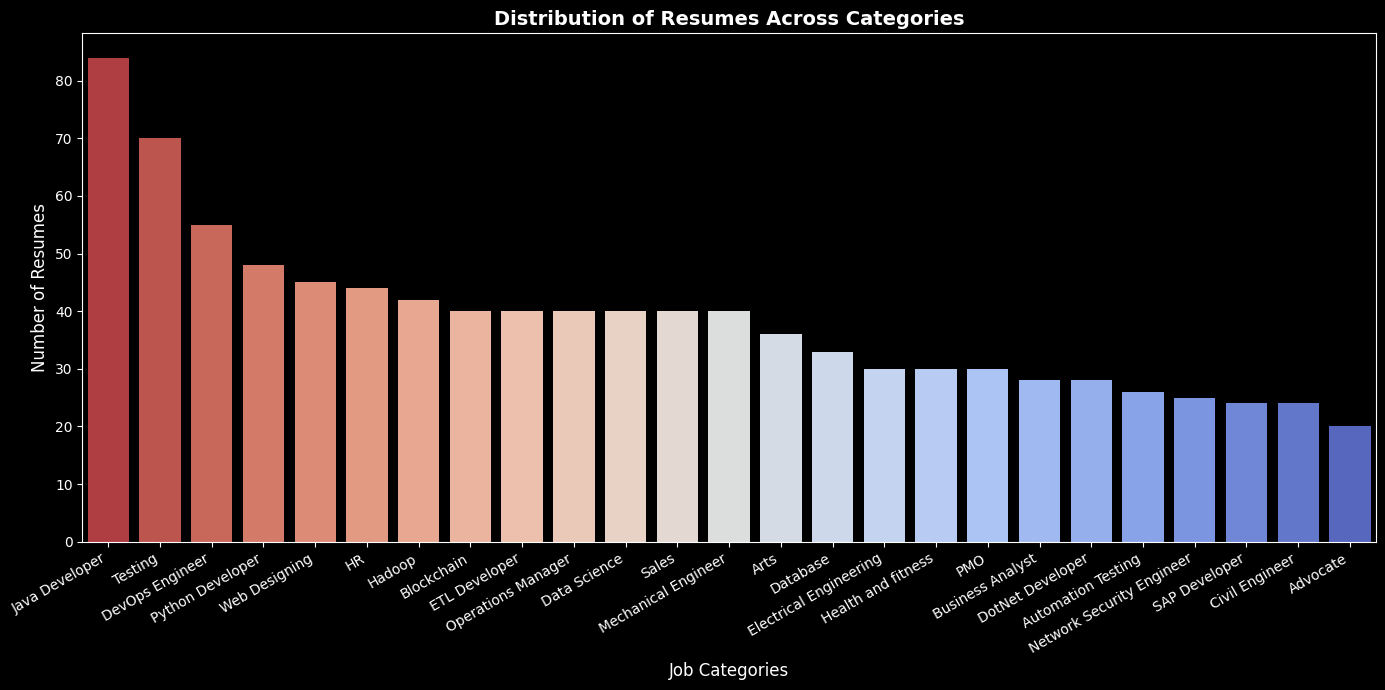

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))  # Expand figure size for better spacing
ax = sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index, palette="coolwarm_r")

# Adding count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=30, ha="right")  # Reduce rotation for better readability
plt.xlabel("Job Categories", fontsize=12)
plt.ylabel("Number of Resumes", fontsize=12)
plt.title("Distribution of Resumes Across Categories", fontsize=14, fontweight='bold')

plt.tight_layout()  # Adjust layout to prevent title/labels from collapsing
plt.savefig("resume_distribution_across_cat.png", dpi=300, bbox_inches="tight")  # Save with high resolution

plt.show()


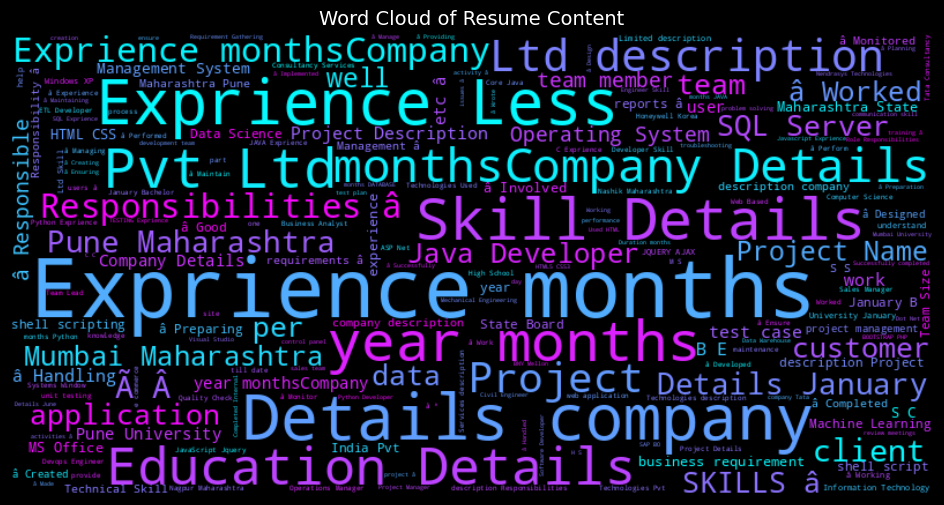

In [9]:
text = " ".join(df["Resume"])
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="cool").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Resume Content", fontsize=14, color="white")

plt.savefig("wordcloud_content.png", dpi=300, bbox_inches="tight")  # Save with high resolution

plt.show()

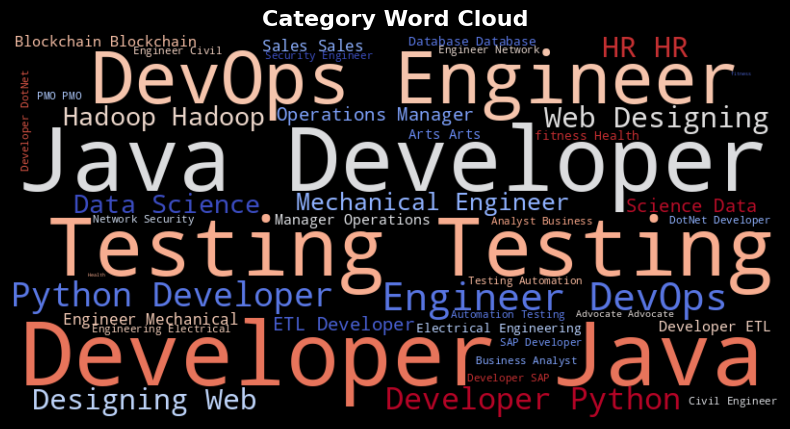

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(
    background_color='black', colormap='coolwarm', width=800, height=400
).generate(" ".join(df['Category']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title("Category Word Cloud", fontsize=16, fontweight='bold', color='white')

# Save the Word Cloud as an image
plt.savefig("category_wordcloud.png", format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [11]:
print ("Displaying the distinct categories of resume:\n\n ")
print (df['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [12]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


# PREPROCESSING


In [13]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [14]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [15]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['cleaned_resume'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [17]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-1

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define models (excluding Naive Bayes / MultinomialNB)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# === TF-IDF Evaluation ===
print("=== Evaluating models using TF-IDF ===")
tfidf_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    tfidf_results[name] = acc
    print(f"{name}: {acc:.4f}")

# === SBERT Embedding ===
print("\nGenerating SBERT Embeddings...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_embeddings = sbert_model.encode(data['cleaned_resume'].tolist(), show_progress_bar=True)
X_sbert = np.array(sbert_embeddings)

X_sbert_train, X_sbert_test, y_sbert_train, y_sbert_test = train_test_split(
    X_sbert, requiredTarget, test_size=0.2, stratify=requiredTarget, random_state=42)

# === SBERT Evaluation ===
print("\n=== Evaluating models using SBERT ===")
sbert_results = {}
for name, model in models.items():
    model.fit(X_sbert_train, y_sbert_train)
    preds = model.predict(X_sbert_test)
    acc = accuracy_score(y_sbert_test, preds)
    sbert_results[name] = acc
    print(f"{name}: {acc:.4f}")

# === Accuracy Comparison Table ===
print("\n=== Comparison of Test Accuracies ===")
comparison_df = pd.DataFrame({
    'TF-IDF Accuracy': pd.Series(tfidf_results),
    'SBERT Accuracy': pd.Series(sbert_results)
})
print(comparison_df)


=== Evaluating models using TF-IDF ===
Logistic Regression: 0.9896
SVM: 0.9948
Decision Tree: 0.9948
Random Forest: 0.9948
Gradient Boosting: 0.9948

Generating SBERT Embeddings...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]


=== Evaluating models using SBERT ===
Random Forest: 0.9948
Gradient Boosting: 0.9948

=== Comparison of Test Accuracies ===
                     TF-IDF Accuracy  SBERT Accuracy
Logistic Regression         0.989637        0.974093
SVM                         0.994819        0.994819
Decision Tree               0.994819        0.994819
Random Forest               0.994819        0.994819
Gradient Boosting           0.994819        0.994819


In [22]:
!pip install PyPDF2


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [23]:
# 1. Train a model (use SVM based on earlier accuracy)
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# 2. Inference function: Upload + Clean + Predict
import PyPDF2

def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

def predict_resume_category(pdf_path):
    # Extract text
    raw_text = extract_text_from_pdf(pdf_path)
    
    # Clean text
    cleaned_text = cleanResume(raw_text)
    
    # Vectorize (TF-IDF)
    tfidf_vector = word_vectorizer.transform([cleaned_text])
    
    # Predict
    pred = svm_model.predict(tfidf_vector)
    
    # Decode label
    predicted_category = le.inverse_transform(pred)[0]
    
    return predicted_category


In [25]:
pdf_path = '/kaggle/input/test-resumes/DevikaR.pdf'  
predicted_domain = predict_resume_category(pdf_path)
print("Predicted Job Domain:", predicted_domain)


Predicted Job Domain: Data Science


In [29]:
import PyPDF2
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Clean and preprocess text
def clean_text(text):
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+|@\S+', '', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)
    return text.lower()

# 2. Extract text from PDF
def extract_pdf_text(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        return ' '.join([page.extract_text() for page in reader.pages if page.extract_text()])

# 3. Calculate relevance score
def get_relevance_score(resume_text, jd_text):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([resume_text, jd_text])
    sim_score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return round(sim_score[0][0], 3)

# 4. Suggest missing keywords from JD
def get_suggested_skills(jd_text, resume_text, top_n=10):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform([jd_text])
    jd_keywords = vectorizer.get_feature_names_out()

    resume_words = set(resume_text.split())
    missing_keywords = [word for word in jd_keywords if word not in resume_words]
    return missing_keywords[:top_n]


In [31]:
# Example usage:

resume_path = '/kaggle/input/test-resumes/DevikaR.pdf'  # your resume file
jd_input = """We are looking for a Data Scientist proficient in Python, SQL, machine learning, and cloud platforms like AWS."""

# Step 1: Extract & clean
resume_raw = extract_pdf_text(resume_path)
resume_clean = clean_text(resume_raw)
jd_clean = clean_text(jd_input)

# Step 2: Relevance score
score = get_relevance_score(resume_clean, jd_clean)
print(f"🔍 Relevance Score (0-1): {score}")

# Step 3: Suggested skills to add
suggested_skills = get_suggested_skills(jd_clean, resume_clean)
print("📌 Suggested Skills to Add in Resume:", suggested_skills)


🔍 Relevance Score (0-1): 0.229
📌 Suggested Skills to Add in Resume: ['aws', 'cloud', 'looking', 'platforms', 'proficient', 'scientist']


In [34]:
import PyPDF2
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Function to extract text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

# Function to clean the extracted text
def clean_text(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.strip()

# Load and clean the JD text
jd_text = """6 year Experienced data scientist required with proficiency in Python, machine learning, and deep learning.
Experience with NLP and cloud services is a plus
"""
jd_cleaned = clean_text(jd_text)

# Extract and clean the resume text
resume_file_path = '/kaggle/input/test-resumes/DevikaR.pdf'
resume_text = extract_text_from_pdf(resume_file_path)
resume_cleaned = clean_text(resume_text)

# Initialize TfidfVectorizer (common vectorizer for both texts)
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform both JD and resume
tfidf_jd = vectorizer.fit_transform([jd_cleaned])
tfidf_resume = vectorizer.transform([resume_cleaned])

# Extract feature names (keywords) and their scores
jd_keywords = vectorizer.get_feature_names_out()
jd_scores = tfidf_jd.toarray().flatten()
resume_scores = tfidf_resume.toarray().flatten()

# Identify keywords that are more prominent in the JD than the resume
suggested_keywords = [
    (keyword, jd_scores[idx])
    for idx, keyword in enumerate(jd_keywords)
    if resume_scores[idx] < jd_scores[idx]
]

# Sort keywords by importance
suggested_keywords = sorted(suggested_keywords, key=lambda x: x[1], reverse=True)

# Display top suggested keywords
print("Suggested keywords to add or emphasize in your resume:")
for keyword, score in suggested_keywords[:10]:
    print(f"{keyword} (Score: {score:.4f})")


Suggested keywords to add or emphasize in your resume:
cloud (Score: 0.2357)
deep (Score: 0.2357)
experience (Score: 0.2357)
experienced (Score: 0.2357)
nlp (Score: 0.2357)
plus (Score: 0.2357)
proficiency (Score: 0.2357)
python (Score: 0.2357)
required (Score: 0.2357)
scientist (Score: 0.2357)


In [35]:
import PyPDF2
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import os
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

# Function to clean the extracted text
def clean_text(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.strip()

# Function to rank resumes for a given JD
def rank_resumes_for_jd(jd_text, resumes_folder_path):
    jd_cleaned = clean_text(jd_text)

    # Extract all resumes from folder
    resume_files = [f for f in os.listdir(resumes_folder_path) if f.endswith('.pdf')]
    resumes_text = []

    for resume_file in resume_files:
        resume_file_path = os.path.join(resumes_folder_path, resume_file)
        resume_text = extract_text_from_pdf(resume_file_path)
        resume_cleaned = clean_text(resume_text)
        resumes_text.append((resume_file, resume_cleaned))

    # Initialize TfidfVectorizer (common vectorizer for both JD and resumes)
    vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

    # Fit and transform the JD and the resumes
    tfidf_jd = vectorizer.fit_transform([jd_cleaned])

    resume_scores = []
    
    for resume_file, resume_cleaned in resumes_text:
        tfidf_resume = vectorizer.transform([resume_cleaned])

        # Calculate cosine similarity between JD and each resume
        relevance_score = cosine_similarity(tfidf_jd, tfidf_resume)[0][0]
        resume_scores.append((resume_file, relevance_score))

    # Sort resumes based on relevance score in descending order (highest relevance first)
    sorted_resumes = sorted(resume_scores, key=lambda x: x[1], reverse=True)
    
    return sorted_resumes

# Example JD text
jd_text = """6 year Experienced data scientist required with proficiency in Python, machine learning, and deep learning.
Experience with NLP and cloud services is a plus."""

# Path to the folder containing resumes
resumes_folder_path = '/kaggle/input/resume-rep'  

# Get ranked resumes for the given JD
ranked_resumes = rank_resumes_for_jd(jd_text, resumes_folder_path)

# Display ranked resumes
print("Ranked Resumes for the given Job Description:")
for rank, (resume_file, score) in enumerate(ranked_resumes, 1):
    print(f"Rank {rank}: {resume_file} - Relevance Score: {score:.4f}")


Ranked Resumes for the given Job Description:
Rank 1: DEVIKAR_RESUME.pdf - Relevance Score: 0.5761
Rank 2: Anjana Menon Resume Updated.pdf - Relevance Score: 0.3629
